> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

# Questions to be answered during this analysis
### 1. Which movies have max/min profit, max/min budget, max/min revenue?
### 2. What is the runtime average for all movies ?
### 3. Who is the director with the most profitable movies?
### 4. What are the most profitable Genres?
### 5. what are movie profits from 1996 to 2015?
### 6.Who are the top ten participating actors in profitable movies

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [38]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
pd.set_option("display.max_colwidth", -1)
#pd.options.display.max_rows = 9999
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,"Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.",124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,"An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.",120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,http://www.starwars.com/films/star-wars-episode-vii,J.J. Abrams,Every generation has a story.,...,"Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers.",136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother.,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Removing unwanted cloumns from the list, they won't be in the scope of the analysis...

In [39]:
df.drop(['id', 'imdb_id','homepage','tagline','overview','keywords','vote_count','vote_average','budget_adj','revenue_adj'], inplace=True, axis=1)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,4/1/15,2015


In [40]:
df.info()
print ('There are {} movies in this list, with {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
release_year            10866 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 933.9+ KB
There are 10866 movies in this list, with 11 columns


From the above output we know that there are 10866 movies in this list.
some columns have null objects
also we need to check if budget, revenue


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

The code below will replace all zeros values to NAN value, then all NAN value are dropped 

In [41]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df[['popularity','budget', 'revenue','runtime','release_year']] = df[['popularity','budget', 'revenue','runtime','release_year']].replace(0, np.NAN)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 11 columns):
popularity              3806 non-null float64
budget                  3806 non-null float64
revenue                 3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null float64
genres                  3806 non-null object
production_companies    3806 non-null object
release_date            3806 non-null object
release_year            3806 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 356.8+ KB


In [42]:
df.release_date = pd.to_datetime(df['release_date']) #datatype casting to datetime
df['release_date'].dtype

dtype('<M8[ns]')

# Database is diminished to 3806 movies titles only!

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (which movies have max/min profit, max/min budget, max/min revenue?)

We need to know each movie's profit (in millions units)  by substracting revenue from budget and adding it to our data frame

In [43]:
df.insert(0,'profit',(df['revenue']-df['budget'])/1000000)

In [44]:
df['profit']=df['profit'].round(decimals = 0) #rounding profit 
df.profit = df.profit.astype(int) #converting to int64 for handling easily

In [45]:
df.describe()

,profit,popularity,budget,revenue,runtime,release_year
count,3806.000000,3806.000000,3.806000e+03,3.806000e+03,3806.000000,3806.000000
mean,71.330005,1.203625,3.760600e+07,1.089450e+08,109.346558,2001.231477
std,151.367733,1.480407,4.231641e+07,1.772829e+08,19.845063,11.329019
min,-414.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,-1.000000,0.470673,1.000000e+07,1.429262e+07,96.000000,1995.000000
50%,20.000000,0.810226,2.500000e+07,4.620904e+07,106.000000,2004.000000
75%,83.000000,1.387058,5.000000e+07,1.260625e+08,119.000000,2010.000000
max,2545.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000


it's clear that the highest movie profit was 2545m USD and the lowest was -414m which is a big loss !

Let's find what are these movies  and also let's find movies with max/min budget and revenue too.

In [52]:
def get_max_min(data_frame,col_num,col_str):
    col_max=data_frame.loc[data_frame[col_num] == data_frame[col_num].max()][col_str].iloc[0]
    col_min=data_frame.loc[data_frame[col_num] == data_frame[col_num].min()][col_str].iloc[0]
    print('"{}" movie is the highest {} of {}m, while "{}" movie is the lowest of {}m'.format(col_max,col_num,data_frame[col_num].max(),col_min,data_frame[col_num].min()))

get_max_min(df,'profit','original_title')
get_max_min(df,'budget','original_title')
get_max_min(df,'revenue','original_title')

"Avatar" movie is the highest profit of 2545m, while "The Warrior's Way" movie is the lowest of -414m
"The Warrior's Way" movie is the highest budget of 425000000.0m, while "Lost & Found" movie is the lowest of 1.0m
"Avatar" movie is the highest revenue of 2781505847.0m, while "Shattered Glass" movie is the lowest of 2.0m


### Research Question 2  (what is the runtime average for all movies ?)

mean run time is : 109.34655806621124 minutes


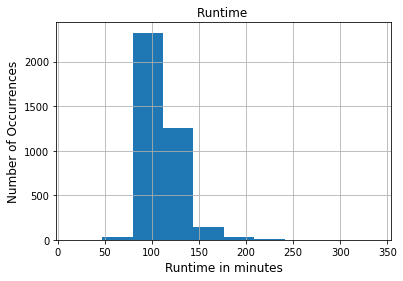

In [53]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.hist(column='runtime');
plt.title("Runtime ")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Runtime in minutes', fontsize=12)
print('mean run time is :',df['runtime'].mean(),'minutes')


### Research Question 3  (who is the director with the most profitable movies?)

Here I will read the database again but I will not drop NAN values, because I will analyze the whole dataset
for profits that are NAN values, the will be replaced by the mean value of all profits.


In [54]:
df_untruncated = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df_untruncated.insert(0,'profit',(df['revenue']-df['budget'])/1000000)
df_untruncated['profit']=df_untruncated['profit'].round(decimals = 0) #rounding profit 
df_untruncated['profit'].fillna(value=df_untruncated['profit'].mean(), inplace=True)
df_untruncated.profit = df_untruncated.profit.astype(int)

df_profit=df_untruncated.query('profit > 0')
df_profit['director'].value_counts()

Woody Allen         39
Clint Eastwood      30
Steven Spielberg    28
Martin Scorsese     26
Ron Howard          20
                    ..
Goran Dukic         1 
Martyn Pick         1 
Xavier Dolan        1 
Eytan Fox           1 
Josh Reed           1 
Name: director, Length: 4818, dtype: int64

and here is the legendary **Woody Allen** in the top of the list. with 39 movie titles !
Next, **Clint Eastwood** and then **Steven Spielberg**!

### Research Question 4  (What is the most profitable Genres?)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


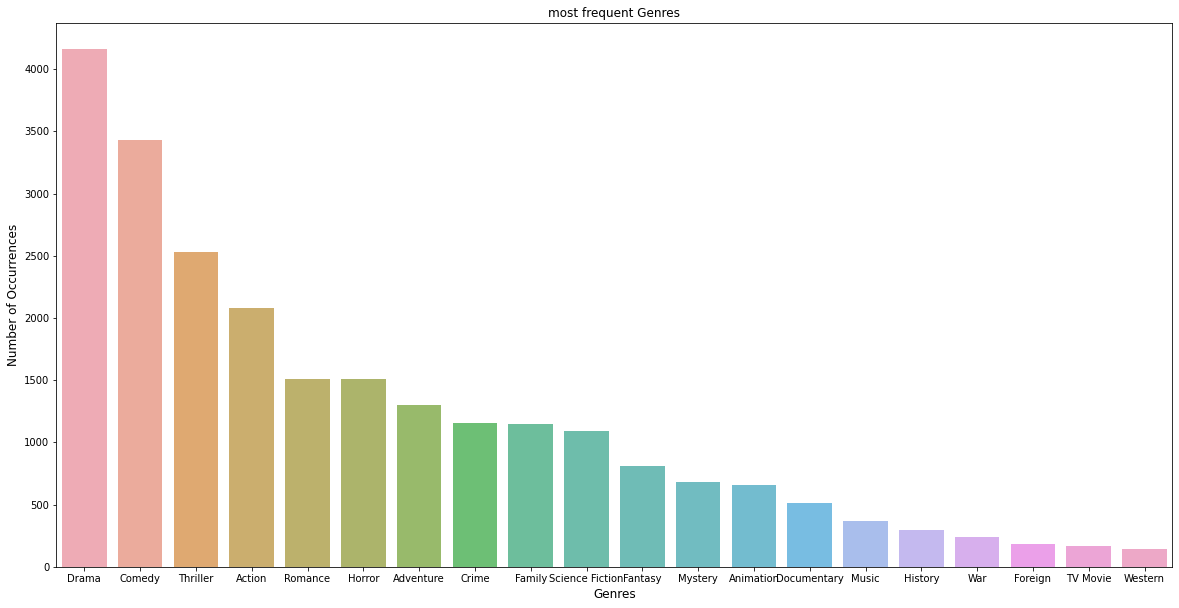

In [55]:
df_profit=df_untruncated.query('profit > 0')
genres_mod=df_profit['genres'].str.cat(sep = '|') 
genres_mod=pd.Series(genres_mod.split('|'))
y=genres_mod.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(y.index, y.values, alpha=0.8)
plt.title('most frequent Genres')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

as ref to https://www.kaggle.com/code/tejainece/seaborn-barplot-and-pandas-value-counts/notebook
I used the code to plot all Genres frequency
Drama came 1st and then Comedy!

### Research Question 5  (what are movie profits from 1996 to 2015?)

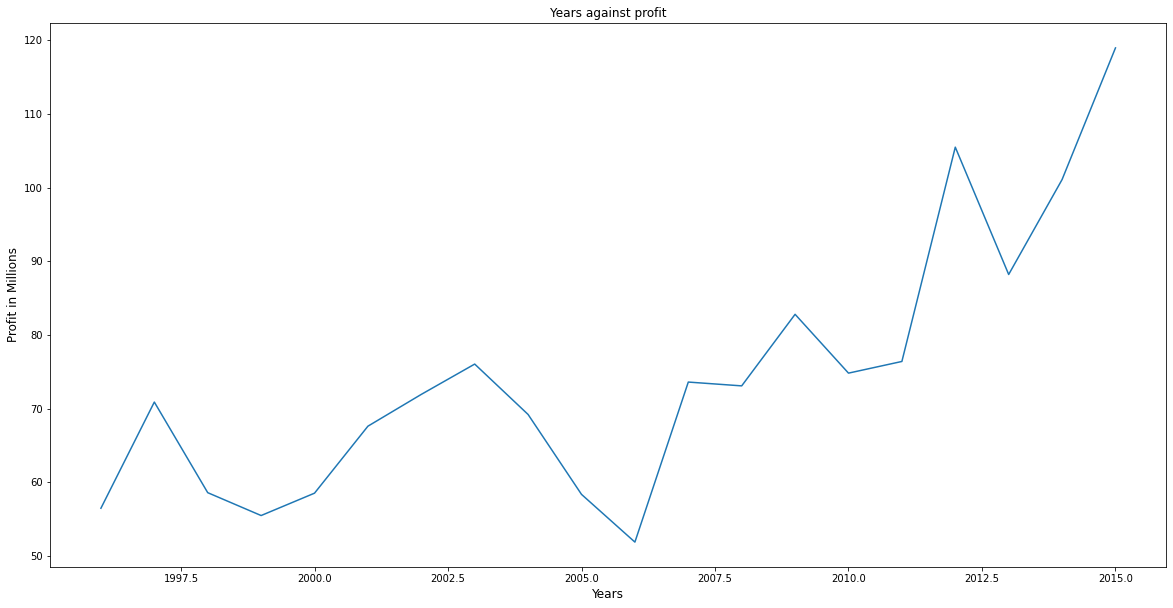

In [56]:
z=df.groupby('release_year').describe()['profit']['mean'][-20:]
plt.figure(figsize=(20,10))
plt.plot(z)
plt.title('Years against profit')
plt.ylabel('Profit in Millions', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.show()

it's clear that profit is increasing and hitting spikes in 2012 & 2015 and we can predict that profit hits more values in the next years.

### Research Question 6 (Who are the top ten participating actors in profitable movies?)

In [57]:
df_profit=df.query('profit > 0')
actors_mod=df_profit['cast'].str.cat(sep = '|') 
actors_mod=pd.Series(actors_mod.split('|'))
y=actors_mod.value_counts()
y.head(10)


Robert De Niro       37
Tom Hanks            33
Bruce Willis         33
Tom Cruise           31
Brad Pitt            30
Samuel L. Jackson    29
Denzel Washington    29
Harrison Ford        28
Morgan Freeman       27
Cameron Diaz         27
dtype: int64

Of course the legendary **Robert De Niro** on top of the list, followed by the lord of all acting **Mr. Tom Hanks** and The most gifted  **Bruce Willis**

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

### Finally, we have come to some conclusions here:
1. Since the data needs some data entry fillings e.g Revenue & budget, not all movies have been taken into consideration
2. **Avatar** movie is by far the most movie I really enjoy myself. and it seems to be so for many user viewers, as it earned 2.7 billions USD as revenue and profit was 2.5 Billions USD.
3. average run time of 109 minutes states clear that not all movies of 120+ mins are preferable for film makers.
4. Woody allen of course hits the top of the list, the father of all directors.
5. It seems Drama , Comedy and Thrillers are the  most genres prefered by audience
6. Profits are increasing rapidly from year to year. audience are growing as much more cinemas open all over the world. so to increase movies profits always aim to increase your audience by building more theaters!
7. last but not least, Mr Robert De Niro is the most frequent actor in the profitable movies list. that's why all film producers want to work with such talent!


#### Since data is limited to movies until year 2015, I suggest updating the list to year 2022 as we will see the effect of COVID-19 on the movie industry and revenues.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0